In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Different_stores_dataset.csv')
df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park


### 1. Check missing values and duplicate records

In [5]:
df.isnull()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,False,False,False,False,False,False,False,False,False,False,False,False,False
99453,False,False,False,False,False,False,False,False,False,False,False,False,False
99454,False,False,False,False,False,False,False,False,False,False,False,False,False
99455,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

In [9]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99452    False
99453    False
99454    False
99455    False
99456    False
Length: 99457, dtype: bool

In [11]:
df[df.duplicated()]

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall


In [13]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 13)


### 2. Add column name 'Total Sales'

In [81]:
df['Total Sales'] = df.quantity	 * df.selling_price_per_unit

df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total profit per unit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00,75.0200
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53,180.0510
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08,5.0200
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25,100.0850
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40,15.1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25,14.6625
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92,3.1380
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92,3.1380
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00,420.0000


### 3. How many customers have age more than 60?

In [30]:
df[df['age'] > 60].customer_id.count()

17169

### 4. How many unique customer_id entries are there? Do any customers make multiple purchases?

In [32]:
df.customer_id.unique()

array(['C241288', 'C111565', 'C266599', ..., 'C103292', 'C800631',
       'C273973'], dtype=object)

In [36]:
df.customer_id.nunique()

99457

In [44]:
customer_purchase_counts = df['customer_id'].value_counts()
multiple_purchases = customer_purchase_counts[customer_purchase_counts > 1]
multiple_purchases

Series([], Name: count, dtype: int64)

### 5. Are there more male or female customers, Show in Pie Chart?

In [48]:
df.gender.value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

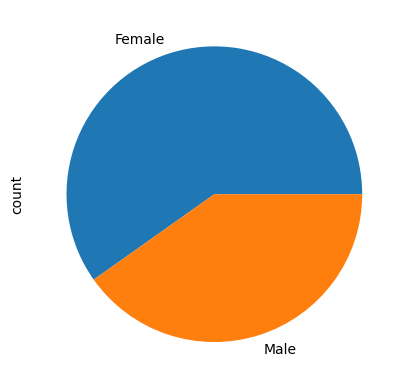

In [46]:
df.gender.value_counts().plot(kind='pie')
plt.show()

### 6. Which category is least popular among customers?

In [50]:
df.category.value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

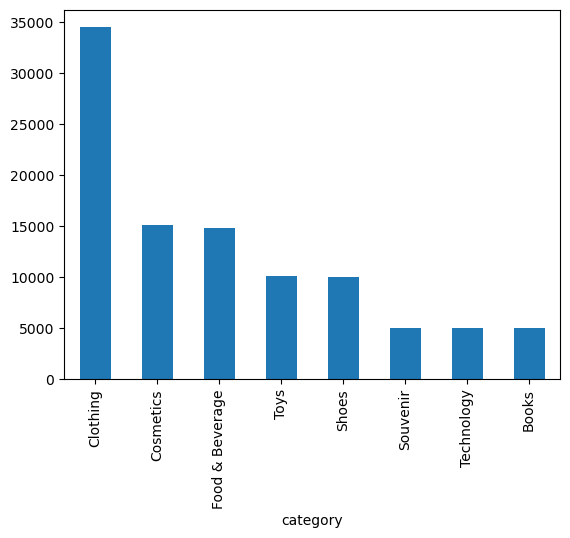

In [52]:
df.category.value_counts().plot(kind='bar')   #books is least popular among customers
plt.show()

### 7. Which category has the highest sales volume?

In [69]:
df.groupby('category')['quantity'].sum()

category
Books               14989
Clothing           103598
Cosmetics           45501
Food & Beverage     44281
Shoes               30217
Souvenir            14871
Technology          15033
Toys                30321
Name: quantity, dtype: int64

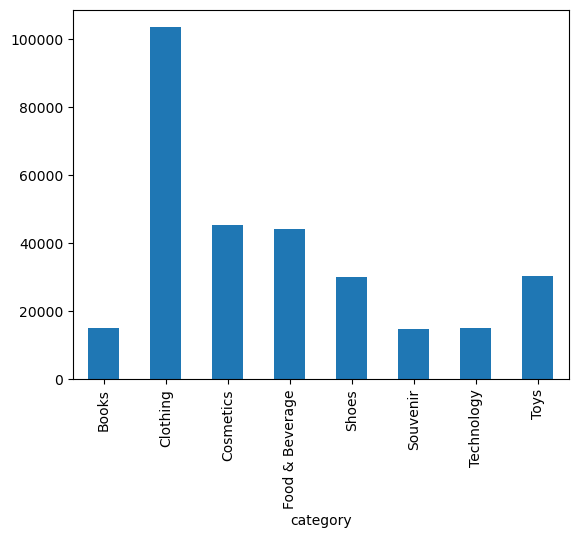

In [75]:
df.groupby('category')['quantity'].sum().plot(kind='bar')   
plt.show()

### 8. Add column name 'Total Profit'

Total Profit=Total Sales−Total Costs

In [87]:
df['Total profit'] = df['Total Sales'] -(df.cost_price_per_unit*df.quantity)

df

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall,Total Sales,Total profit per unit,Total profit
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.3800,Credit Card,South,Kentucky,Kanyon,7502.00,75.0200,375.1000
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.4590,Debit Card,South,Kentucky,Viaport Outlet,5401.53,180.0510,540.1530
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.0600,Cash,West,California,Metrocity,300.08,5.0200,5.0200
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.7650,Credit Card,South,Florida,Metropol AVM,15004.25,100.0850,500.4250
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.4500,Cash,South,Florida,Kanyon,242.40,15.1500,60.6000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,45,Souvenir,5,58.65,43.9875,Credit Card,South,Alabama,Kanyon,293.25,14.6625,73.3125
99453,I325143,11/15/2016 12:43,C569580,Male,27,Food & Beverage,2,10.46,7.3220,Cash,South,Alabama,Viaport Outlet,20.92,3.1380,6.2760
99454,I824010,11/15/2016 12:44,C103292,Male,63,Food & Beverage,2,10.46,7.3220,Debit Card,South,Alabama,Metrocity,20.92,3.1380,6.2760
99455,I702964,11/15/2016 12:44,C800631,Male,56,Technology,4,4200.00,3780.0000,Cash,South,Georgia,Istinye Park,16800.00,420.0000,1680.0000


### 9. Display the top 10 invoices with the highest quantities sold?

In [124]:
df[['invoice_no', 'quantity']].sort_values(by='quantity', ascending=False).head(10)

,invoice_no,quantity
100,I283443,15
275,I282789,12
109,I293215,12
305,I115679,11
129,I160221,10
61,I207205,10
224,I353272,10
201,I286193,9
145,I246375,8
11,I139207,8


### 10. Which payment method is most commonly used?

In [128]:
df.payment_method.value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

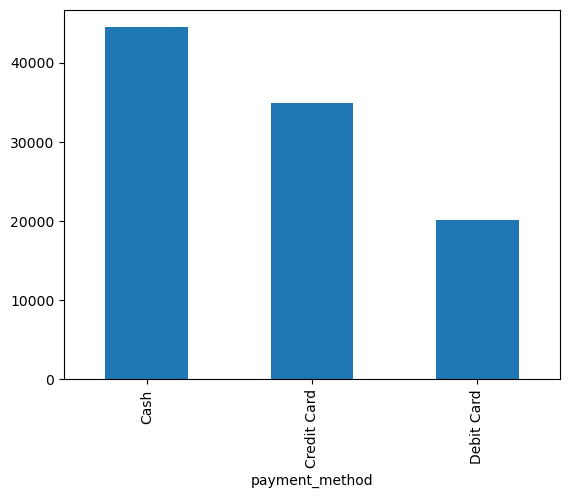

In [130]:
df.payment_method.value_counts().plot(kind='bar')   
plt.show()

### 11. Total Sales with respect to region?

In [132]:
df.groupby('region')['Total Sales'].sum()

region
Central    58803471.74
East       72280660.57
South      40655491.64
West       79825624.03
Name: Total Sales, dtype: float64

### 12. Sort Malls with average sales higher to lower?

In [183]:
avg_sales_by_mall = df.groupby('shopping_mall')['Total Sales'].mean()
avg_sales_by_mall_sorted = avg_sales_by_mall.sort_values(ascending=False)
avg_sales_by_mall_sorted

shopping_mall
Zorlu Center        2573.248351
Kanyon              2550.618396
Mall of Istanbul    2543.276766
Viaport Outlet      2523.835118
Istinye Park        2523.186677
Metropol AVM        2497.777108
Metrocity           2485.030133
Name: Total Sales, dtype: float64

### 13. Sort categories with the highest profit margins display in bar plot?

Profit Margin=(Total Sales/Total Profit)×100

<Axes: title={'center': 'Profit Margins by Category'}, xlabel='Category', ylabel='Profit Margin (%)'>

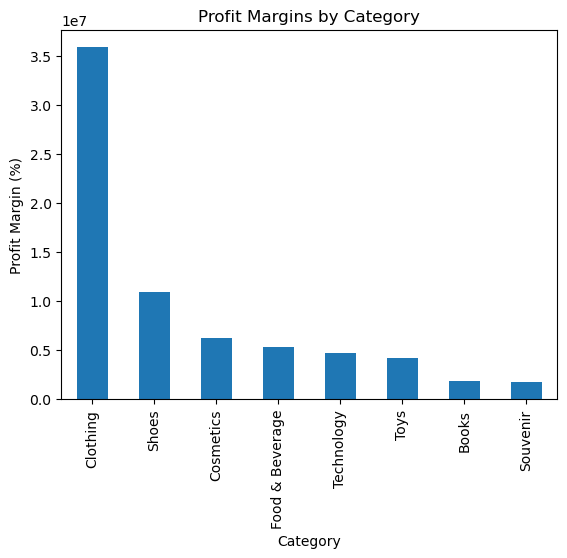

In [152]:
df['pm'] = (df['Total Sales'] / df['Total profit']) * 100
category_pm = df.groupby('category')['pm'].sum()
category_pm_sorted = category_pm.sort_values(ascending=False)
category_pm_sorted.plot(kind='bar', title='Profit Margins by Category', xlabel='Category', ylabel='Profit Margin (%)')


### 14.  What is the total number of transactions per region for each payment method?

In [160]:
df.groupby(['region','payment_method'])['invoice_no'].count()

region   payment_method
Central  Cash              10319
         Credit Card        8140
         Debit Card         4640
East     Cash              12738
         Credit Card        9817
         Debit Card         5751
South    Cash               7227
         Credit Card        5698
         Debit Card         3284
West     Cash              14163
         Credit Card       11276
         Debit Card         6404
Name: invoice_no, dtype: int64

### 15. How do sales in different categories compare between males and females?

In [173]:
sales_comparison = df.groupby(['gender', 'category'])['Total Sales'].sum().unstack()
sales_comparison

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,489420.75,68260097.84,4068073.66,505322.60,39425167.30,382867.20,34669950.0,2416046.08
Male,345238.20,45754397.92,2728611.28,344233.37,27128284.17,252957.45,23230200.0,1564380.16


<Axes: title={'center': 'Sales Comparison between Males and Females by Category'}, xlabel='Category', ylabel='Total Sales'>

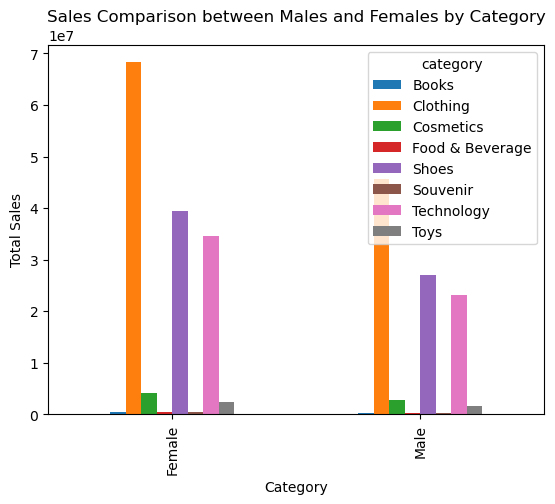

In [179]:
sales_comparison.plot(kind='bar', stacked=False, title="Sales Comparison between Males and Females by Category", xlabel="Category", ylabel="Total Sales")
